In [2]:
!pip install nltk

     |################################| 1.5 MB 4.4 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('all_data.csv', names =['label', 'headline'], encoding='latin-1')

In [4]:
sentences = df.headline.values

In [5]:
labels = df.label.values

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sentences, labels, 
                                                            random_state=56, test_size=0.2)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                            random_state=56, test_size=0.2)

In [8]:
res_dict = {0:'negative', 1:'neutral', 2:'positive'}

In [9]:
def sentiment(sentence):
    result = sid.polarity_scores(sentence)
    
    res = list(result.values())
    index = np.argmax(res[:3])
    return res_dict[index]

In [10]:
output = []
for i in X_test:
    output.append(sentiment(i))

In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, output))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       116
     neutral       0.60      1.00      0.75       580
    positive       0.60      0.01      0.02       274

    accuracy                           0.60       970
   macro avg       0.40      0.34      0.26       970
weighted avg       0.53      0.60      0.45       970



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, output)
cm

array([[  0, 116,   0],
       [  0, 578,   2],
       [  0, 271,   3]])

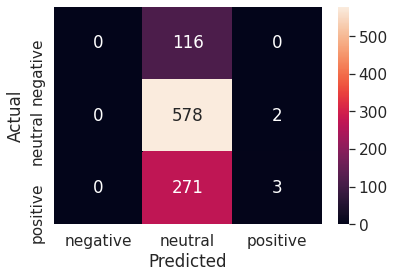

In [14]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
target_names = ['negative', 'neutral', 'positive']

df_cm = pd.DataFrame(cm, target_names, target_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, fmt='d') # font size

plt.show()